####Machine Learning CA2

####6900: Janhavi Sachin Phulavare
####MSCDA Part II

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.offline import iplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split

Loading Dataset

In [ ]:
df=pd.read_csv('Employee.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.11,0.91,7,287,4,0,1,0,sales,low
1,0.99,0.39,6,214,5,1,0,0,sales,low
2,0.39,0.53,2,136,3,0,1,0,hr,low
3,0.48,0.89,5,179,3,0,0,0,management,medium
4,0.93,0.50,5,272,3,0,0,0,sales,low


In [ ]:
df.shape

(4255, 10)

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4255 entries, 0 to 4254
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     4255 non-null   float64
 1   last_evaluation        4255 non-null   float64
 2   number_project         4255 non-null   int64  
 3   average_monthly_hours  4255 non-null   int64  
 4   tenure                 4255 non-null   int64  
 5   work_accident          4255 non-null   int64  
 6   left                   4255 non-null   int64  
 7   promotion_last_5years  4255 non-null   int64  
 8   department             4186 non-null   object 
 9   salary                 4231 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 332.5+ KB


Get Overall Statistics About The Dataset

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years
count,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000
mean,0.557467,0.717659,3.836898,202.275911,3.843713,0.119859,0.467920,0.021857
std,0.263968,0.179357,1.436544,53.908410,1.649256,0.324835,0.499028,0.146233
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.390000,0.540000,3.000000,151.000000,3.000000,0.000000,0.000000,0.000000
50%,0.570000,0.730000,4.000000,202.000000,3.000000,0.000000,0.000000,0.000000
75%,0.780000,0.880000,5.000000,250.000000,5.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Cleaning

Check Null Values In The Dataset

In [ ]:
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_monthly_hours,0
tenure,0
work_accident,0
left,0
promotion_last_5years,0
department,69
salary,24


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_monthly_hours,0
tenure,0
work_accident,0
left,0
promotion_last_5years,0
department,0
salary,0


Check Duplicate Values In The Dataset

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(4162, 10)

In [ ]:
#Converting our object data types into categorical
df['department'] = df['department'].astype('category')
df['salary'] = df['salary'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4162 entries, 0 to 4254
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     4162 non-null   float64 
 1   last_evaluation        4162 non-null   float64 
 2   number_project         4162 non-null   int64   
 3   average_monthly_hours  4162 non-null   int64   
 4   tenure                 4162 non-null   int64   
 5   work_accident          4162 non-null   int64   
 6   left                   4162 non-null   int64   
 7   promotion_last_5years  4162 non-null   int64   
 8   department             4162 non-null   category
 9   salary                 4162 non-null   category
dtypes: category(2), float64(2), int64(6)
memory usage: 301.3 KB


In [ ]:
#Renaming some columns
column_name_mapping = {
    'last_evaluation': 'evaluation_score',
    'number_project': 'project_count',
    'average_monthly_hours': 'monthly_hours',
    'work_accident': 'had_accident',
    'promotion_last_5years': 'had_promotion',
    'salary': 'salary_level'
}

df.rename(columns=column_name_mapping, inplace=True)
df.head()

,satisfaction_level,evaluation_score,project_count,monthly_hours,tenure,had_accident,left,had_promotion,department,salary_level
0,0.11,0.91,7,287,4,0,1,0,sales,low
1,0.99,0.39,6,214,5,1,0,0,sales,low
2,0.39,0.53,2,136,3,0,1,0,hr,low
3,0.48,0.89,5,179,3,0,0,0,management,medium
4,0.93,0.50,5,272,3,0,0,0,sales,low


We can also add new columns such as work_intensity that combines number of projects an employee has and the number of hours done in a month.

In [ ]:
df['work_intensity'] = df['project_count'] * df['monthly_hours']
df.head()

,satisfaction_level,evaluation_score,project_count,monthly_hours,tenure,had_accident,left,had_promotion,department,salary_level,work_intensity
0,0.11,0.91,7,287,4,0,1,0,sales,low,2009
1,0.99,0.39,6,214,5,1,0,0,sales,low,1284
2,0.39,0.53,2,136,3,0,1,0,hr,low,272
3,0.48,0.89,5,179,3,0,0,0,management,medium,895
4,0.93,0.50,5,272,3,0,0,0,sales,low,1360


Spliting columns into numerical and categorical :

In [ ]:
cat_cols=['department','salary_level']
num_cols=[]
for i in df.columns:
    if i!='left' and i not in cat_cols:
        num_cols.append(i)
num_cols

['satisfaction_level',
 'evaluation_score',
 'project_count',
 'monthly_hours',
 'tenure',
 'had_accident',
 'had_promotion',
 'work_intensity']

<Axes: >

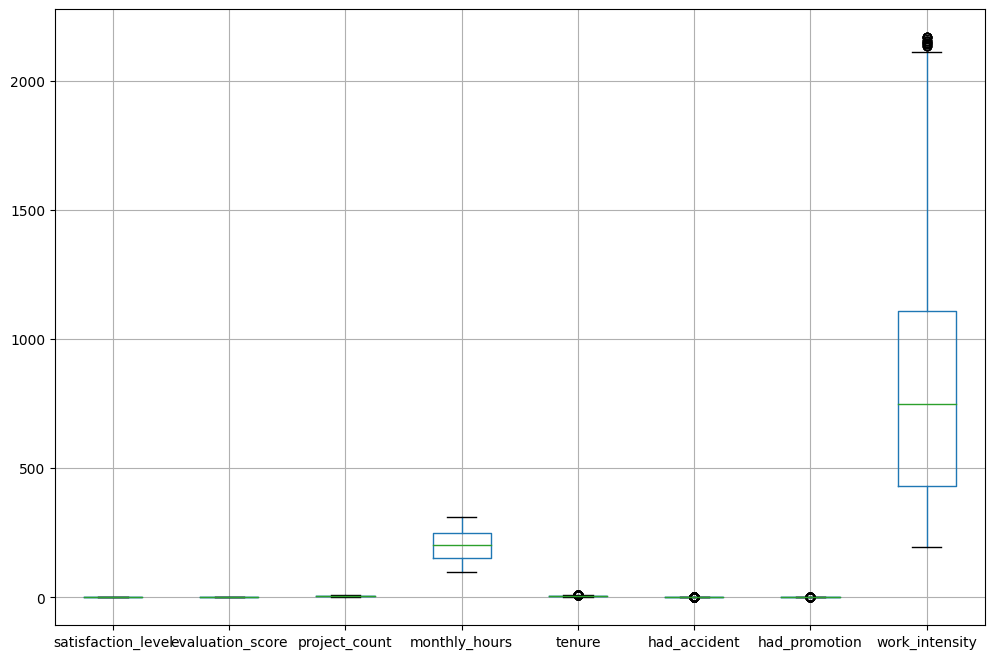

In [ ]:
plt.figure(figsize=(12, 8))
df.boxplot(num_cols)

EDA

In [ ]:
import plotly.express as px

# Accident Distribution
accident_distribution = df['had_accident'].value_counts()
labels = ['No Accident', 'Had Accident']

# Plot Pie Chart using Plotly with valid color sequence
fig = px.pie(values=accident_distribution, names=labels,
             title='Distribution of Work Accidents',
             color_discrete_sequence=px.colors.qualitative.Set2,  # Use Set2 instead of Paired
             hole=0.4)

fig.update_traces(textinfo='percent+label')
fig.show()


In [ ]:
# Distribution for employees who left
distribution = df['left'].value_counts()
labels = ['Did Not Leave', 'Left']

# Plot Pie Chart using Plotly with valid color sequence
fig = px.pie(values=distribution, names=labels,
             title='Distribution of Employees Who Left',
             color_discrete_sequence=px.colors.qualitative.Set2,  # Use Set2 instead of Paired
             hole=0.4)

fig.update_traces(textinfo='percent+label')
fig.show()


In [ ]:
# Promotion Distribution
promotion_distribution = df['had_promotion'].value_counts()
labels = ['No Promotion', 'Had Promotion']

# Plot Pie Chart using Plotly with valid color sequence
fig = px.pie(values=promotion_distribution, names=labels,
             title='Distribution of Promotions in Last 5 Years',
             color_discrete_sequence=px.colors.qualitative.Set2,  # Use Set2 instead of Paired
             hole=0.4)

fig.update_traces(textinfo='percent+label')
fig.show()


In [ ]:
# Department Count
dept_counts = df['department'].value_counts().sort_values(ascending=False)

# Plot Count Plot using Plotly
fig = px.bar(df, x=dept_counts.index, y=dept_counts.values,
             title='Department Count',
             color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_layout(xaxis_title="Department", yaxis_title="Count")
fig.show()


Text(0.5, 1.0, 'Salary Level Distribution')

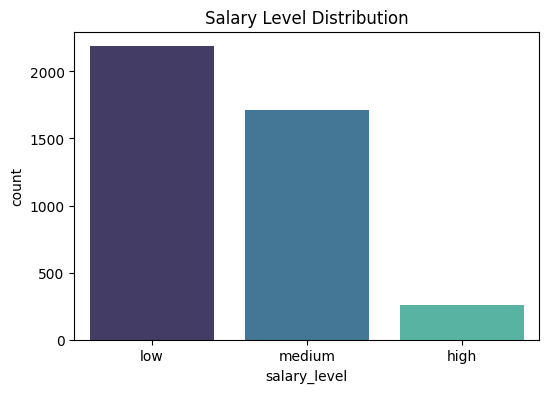

In [ ]:
# 7. Countplots for Categorical Features
dept_counts = df['salary_level'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='salary_level',order=dept_counts.index,palette="mako")
plt.title('Salary Level Distribution')

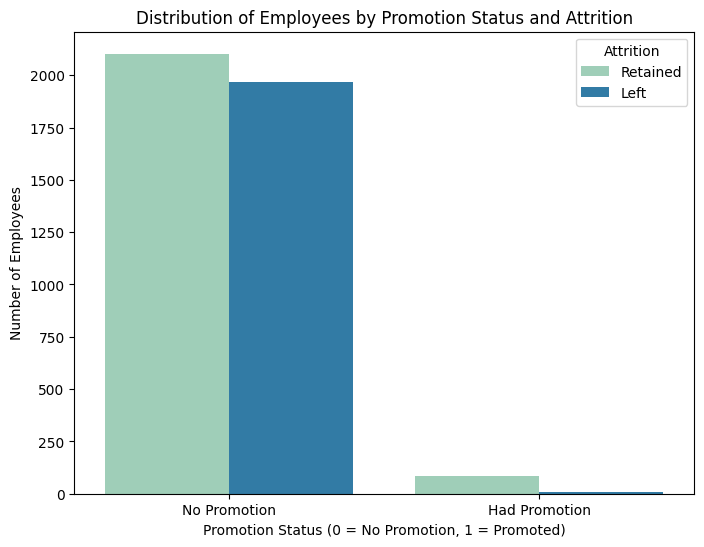

In [ ]:
#barplot on promotion status vs attrition
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='had_promotion', hue='left',palette="YlGnBu")
plt.title('Distribution of Employees by Promotion Status and Attrition')
plt.xlabel('Promotion Status (0 = No Promotion, 1 = Promoted)')
plt.ylabel('Number of Employees')
plt.xticks(ticks=[0, 1], labels=['No Promotion', 'Had Promotion'])
plt.legend(title='Attrition', loc='upper right', labels=['Retained', 'Left'])
plt.show()

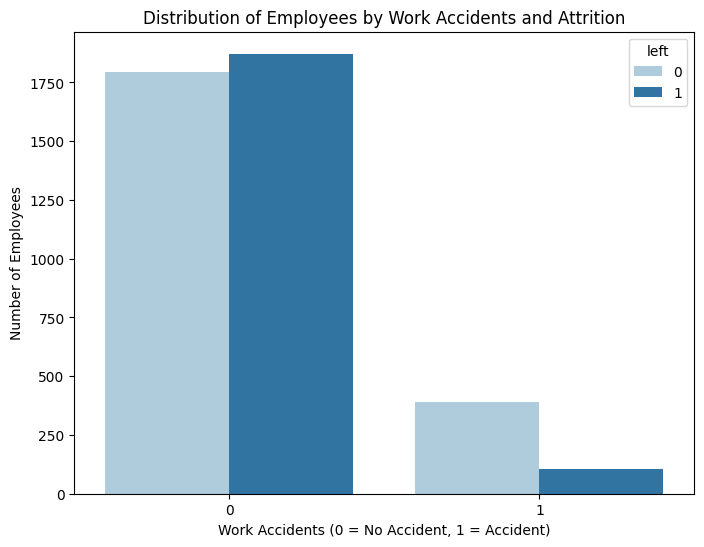

In [ ]:
#accidents vs left
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='had_accident', hue='left',palette="Paired")
plt.title('Distribution of Employees by Work Accidents and Attrition')
plt.xlabel('Work Accidents (0 = No Accident, 1 = Accident)')
plt.ylabel('Number of Employees')

plt.show()

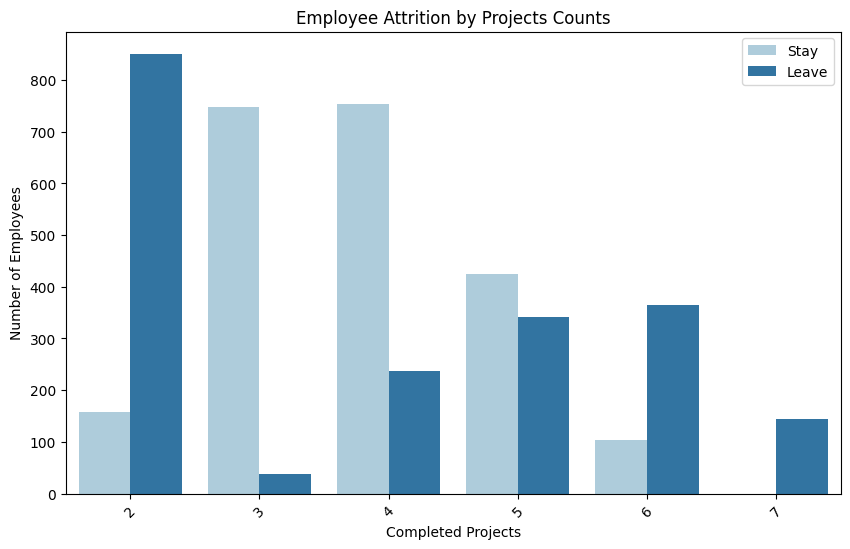

In [ ]:
#attrition by department
plt.figure(figsize=(10, 6))
labels = ['Stay', 'Leave']
sns.countplot(data=df, x='project_count', hue='left',palette="Paired")
plt.title('Employee Attrition by Projects Counts')
plt.xlabel('Completed Projects')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(labels=labels)
plt.show()

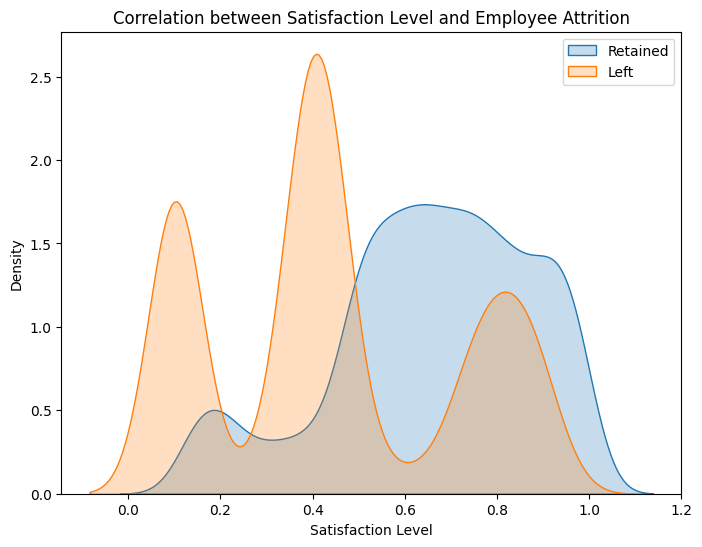

In [ ]:
#Satisfaction level vs attrition
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df[df['left'] == 0]['satisfaction_level'], label='Retained', fill=True)
sns.kdeplot(data=df[df['left'] == 1]['satisfaction_level'], label='Left', fill=True)
plt.title('Correlation between Satisfaction Level and Employee Attrition')
plt.xlabel('Satisfaction Level')
plt.ylabel('Density')
plt.legend()
plt.show()

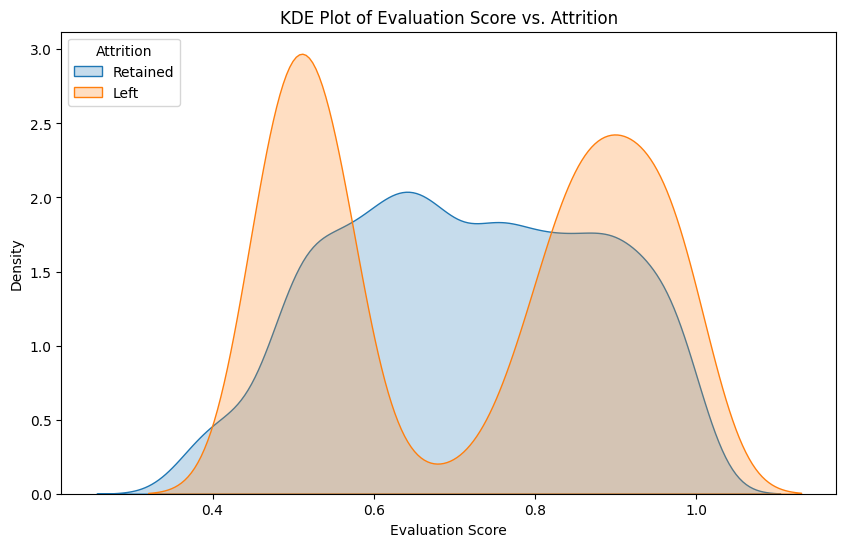

In [ ]:
#evaluation score vs attrition
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['left'] == 0]['evaluation_score'], label='Retained', fill=True)
sns.kdeplot(data=df[df['left'] == 1]['evaluation_score'], label='Left', fill=True)
plt.title('KDE Plot of Evaluation Score vs. Attrition')
plt.xlabel('Evaluation Score')
plt.ylabel('Density')
plt.legend(title='Attrition', loc='upper left', labels=['Retained', 'Left'])

plt.show()

In [ ]:
# Stacked bar chart for department and attrition
fig = px.histogram(df, x='department', color='left', barmode='stack',
                   labels={'left': 'Attrition'},
                   title='Attrition by Department (Stacked)')
fig.show()


In [ ]:
# Stacked bar chart for department and attrition
fig = px.histogram(df, x='salary_level', color='left', barmode='stack',
                   labels={'left': 'Attrition'},
                   title='Attrition by Salary Level (Stacked)')
fig.show()

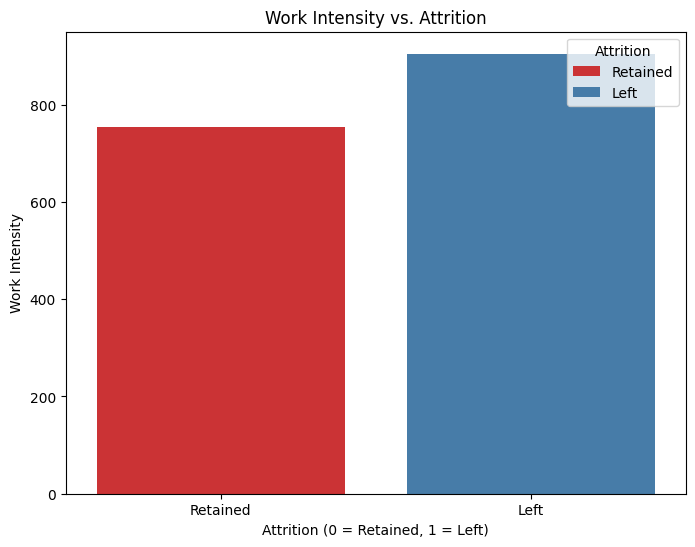

In [ ]:
#Work intensity vs attrition
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='left', y='work_intensity', hue='left', palette='Set1', errorbar=None)
plt.title('Work Intensity vs. Attrition')
plt.xlabel('Attrition (0 = Retained, 1 = Left)')
plt.ylabel('Work Intensity')
plt.xticks(ticks=[0, 1], labels=['Retained', 'Left'])
plt.legend(title='Attrition', loc='upper right', labels=['Retained', 'Left'])
plt.show()


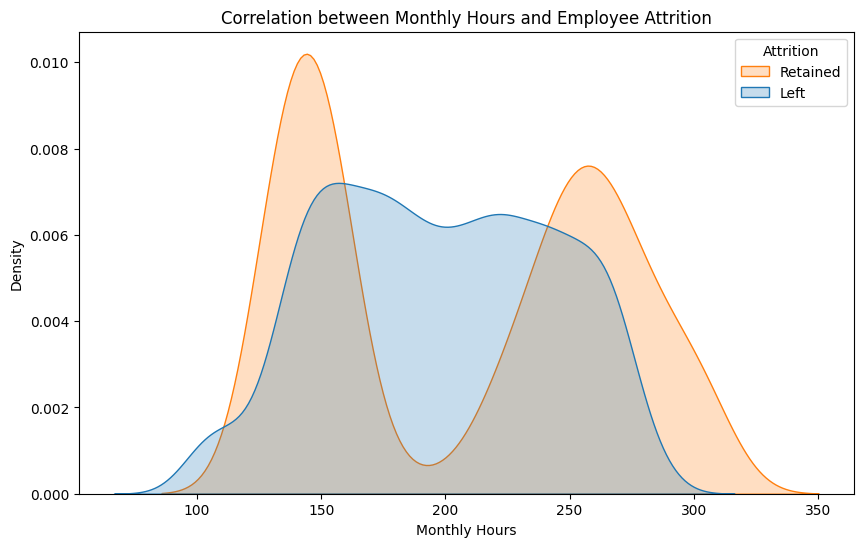

In [ ]:
#monthly hours vs attrition
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='monthly_hours', hue='left', common_norm=False, fill=True)
plt.title('Correlation between Monthly Hours and Employee Attrition')
plt.legend(title='Attrition', loc='upper right', labels=['Retained', 'Left'])
plt.xlabel('Monthly Hours')
plt.ylabel('Density')
plt.show()

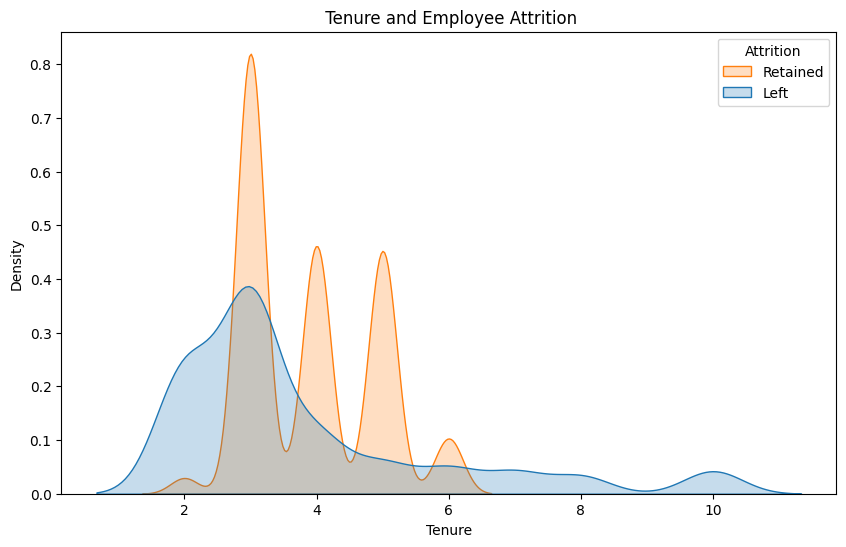

In [ ]:
#monthly hours vs attrition
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='tenure', hue='left', common_norm=False, fill=True)
plt.title(' Tenure and Employee Attrition')
plt.xlabel('Tenure')
plt.legend(title='Attrition', loc='upper right', labels=['Retained', 'Left'])
plt.ylabel('Density')
plt.show()

In [ ]:
fig = px.pie(df, names='overtime', title='Overtime Distribution',
             labels={'overtime': 'Overtime'},
             color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()


In [ ]:
pdf = hr_data_encoded.groupby(['overtime', 'left']).size().reset_index()
pdf['percentage'] = hr_data_encoded.groupby(['overtime', 'left']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values

# Create a dictionary that maps the variable names to the desired data types to ensure proper plotting
vars_types = {"left": "category","overtime": "category"}

# Use the astype() function to apply the desired data types to the variables in the dataframe
pdf = pdf.astype(vars_types)

pdf.columns=['overtime', 'left', 'Counts', 'Percentage']

fig=px.bar(pdf, x='overtime', y=['Counts'], color='left', text=pdf['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

fig=fig.update_layout(height=400, width=600, title_x=0.5, legend_title=' ',
                      legend=dict(
                          yanchor="top",
                          y=0.99,
                          xanchor="left",
                          x=0.01,
                          title_text='',
                          title_font=dict(size=14),
                          itemsizing='constant'
                      ))

fig=fig.update_xaxes(title_text='Work Overtime')
fig=fig.update_yaxes(title_text='Count')

# Update legend values
fig=fig.for_each_trace(lambda t: t.update(name='Stay' if t.name == '0' else 'Left'))

fig.show()


Feauture Selection and Transformation

In [ ]:
#encode department
hr_data_encoded = pd.get_dummies(df, columns=['department'], prefix='department')
hr_data_encoded.head()

,satisfaction_level,evaluation_score,project_count,monthly_hours,tenure,had_accident,left,had_promotion,salary_level,work_intensity,...,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.11,0.91,7,287,4,0,1,0,low,2009,...,False,False,False,False,False,False,False,True,False,False
1,0.99,0.39,6,214,5,1,0,0,low,1284,...,False,False,False,False,False,False,False,True,False,False
2,0.39,0.53,2,136,3,0,1,0,low,272,...,False,False,False,True,False,False,False,False,False,False
3,0.48,0.89,5,179,3,0,0,0,medium,895,...,False,False,False,False,True,False,False,False,False,False
4,0.93,0.50,5,272,3,0,0,0,low,1360,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
hr_data_encoded.salary_level.unique()

['low', 'medium', 'high']
Categories (3, object): ['high', 'low', 'medium']

In [ ]:
hr_data_encoded.replace({ 'salary_level': {'high':0 ,'low':1,'medium':2}} ,inplace=True)

In [ ]:
hr_data_encoded.head()

,satisfaction_level,evaluation_score,project_count,monthly_hours,tenure,had_accident,left,had_promotion,salary_level,work_intensity,...,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.11,0.91,7,287,4,0,1,0,1,2009,...,False,False,False,False,False,False,False,True,False,False
1,0.99,0.39,6,214,5,1,0,0,1,1284,...,False,False,False,False,False,False,False,True,False,False
2,0.39,0.53,2,136,3,0,1,0,1,272,...,False,False,False,True,False,False,False,False,False,False
3,0.48,0.89,5,179,3,0,0,0,2,895,...,False,False,False,False,True,False,False,False,False,False
4,0.93,0.50,5,272,3,0,0,0,1,1360,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
hr_data_encoded.salary_level.unique()

[1, 2, 0]
Categories (3, int64): [0, 1, 2]

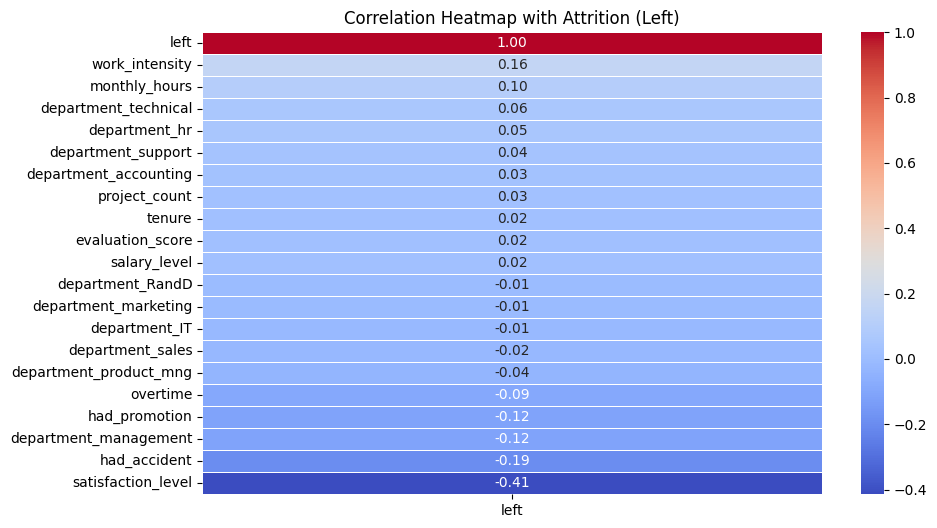

In [ ]:
correlation_matrix = hr_data_encoded.corr(method='pearson')

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['left']].sort_values(by='left', ascending=False), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap with Attrition (Left)")
plt.show()

In [ ]:
#dropping departments as since it will not bring value to our model

columns_to_drop = [
    'department_IT', 'department_RandD', 'department_accounting',
    'department_hr', 'department_management', 'department_marketing',
    'department_product_mng', 'department_sales', 'department_support',
    'department_technical'
]

hr_data_encoded.drop(columns=columns_to_drop, inplace=True)

In [ ]:
hr_data_encoded.head()

,satisfaction_level,evaluation_score,project_count,monthly_hours,tenure,had_accident,left,had_promotion,salary_level,work_intensity,overtime
0,0.11,0.91,7,287,4,0,1,0,1,2009,1
1,0.99,0.39,6,214,5,1,0,0,1,1284,1
2,0.39,0.53,2,136,3,0,1,0,1,272,0
3,0.48,0.89,5,179,3,0,0,0,2,895,1
4,0.93,0.50,5,272,3,0,0,0,1,1360,1


Feature Extraction

In [ ]:
hr_data_encoded['overtime'] = (hr_data_encoded['monthly_hours'] > 174).astype(int)

In [ ]:
hr_data_encoded['work_life_balance'] = hr_data_encoded['satisfaction_level'] / (hr_data_encoded['monthly_hours'] * hr_data_encoded['tenure'])
hr_data_encoded.head()

,satisfaction_level,evaluation_score,project_count,monthly_hours,tenure,had_accident,left,had_promotion,salary_level,work_intensity,...,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,work_life_balance
0,0.11,0.91,7,287,4,0,1,0,1,2009,...,False,False,False,False,False,False,True,False,False,0.000096
1,0.99,0.39,6,214,5,1,0,0,1,1284,...,False,False,False,False,False,False,True,False,False,0.000925
2,0.39,0.53,2,136,3,0,1,0,1,272,...,False,False,True,False,False,False,False,False,False,0.000956
3,0.48,0.89,5,179,3,0,0,0,2,895,...,False,False,False,True,False,False,False,False,False,0.000894
4,0.93,0.50,5,272,3,0,0,0,1,1360,...,False,False,False,False,False,False,True,False,False,0.001140


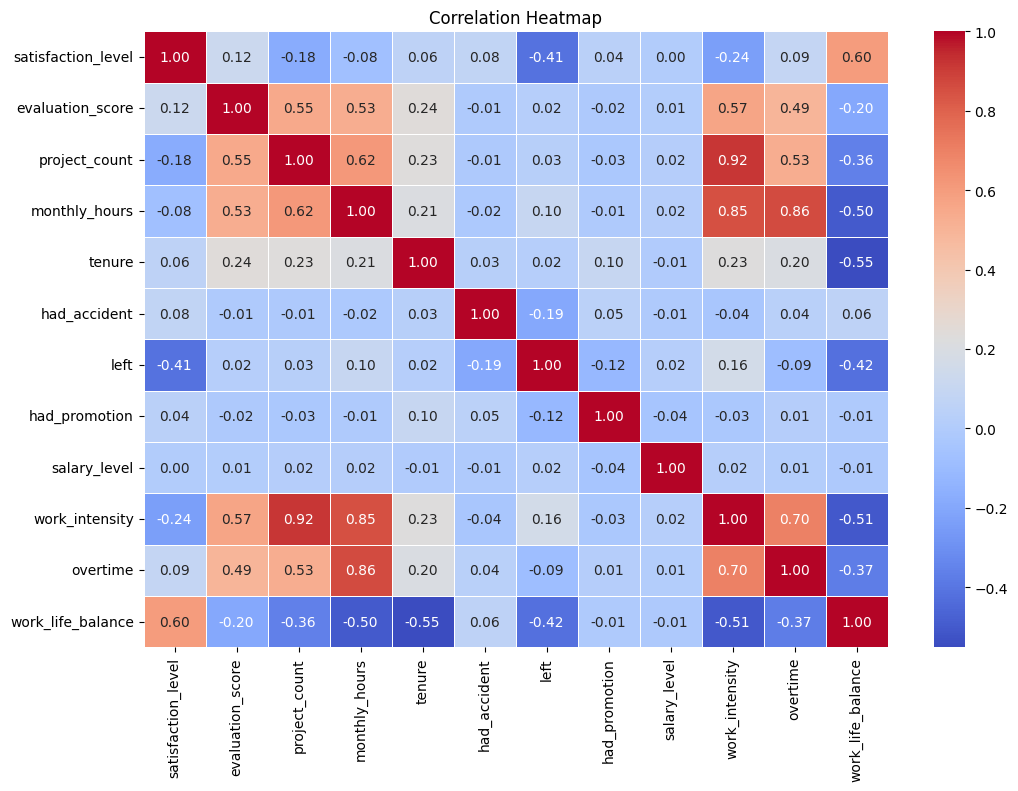

In [ ]:
correlation_matrix = hr_data_encoded.corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
hr_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4162 entries, 0 to 4254
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   satisfaction_level  4162 non-null   float64 
 1   evaluation_score    4162 non-null   float64 
 2   project_count       4162 non-null   int64   
 3   monthly_hours       4162 non-null   int64   
 4   tenure              4162 non-null   int64   
 5   had_accident        4162 non-null   int64   
 6   left                4162 non-null   int64   
 7   had_promotion       4162 non-null   int64   
 8   salary_level        4162 non-null   category
 9   work_intensity      4162 non-null   int64   
 10  overtime            4162 non-null   int64   
 11  work_life_balance   4162 non-null   float64 
dtypes: category(1), float64(3), int64(8)
memory usage: 394.4 KB


Model Building

In [ ]:
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score, roc_auc_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.3.2.


In [ ]:
#Define our predictor variables(X) and outcome variable (y)
X = hr_data_encoded.drop(columns=['left'])
y = hr_data_encoded['left']

In [ ]:
X.head()

,satisfaction_level,evaluation_score,project_count,monthly_hours,tenure,had_accident,had_promotion,salary_level,work_intensity,overtime,work_life_balance
0,0.11,0.91,7,287,4,0,0,1,2009,1,0.000096
1,0.99,0.39,6,214,5,1,0,1,1284,1,0.000925
2,0.39,0.53,2,136,3,0,0,1,272,0,0.000956
3,0.48,0.89,5,179,3,0,0,2,895,1,0.000894
4,0.93,0.50,5,272,3,0,0,1,1360,1,0.001140


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(X)

In [ ]:
#Split our data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)

X_train: (3121, 11)
y_train: (3121,)
X_test: (1041, 11)
y_test: (1041,)
X_val: (781, 11)
y_val: (781,)


In [ ]:
#Train our model

lr_model = LogisticRegression(max_iter = 1000,random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred_lr = lr_model.predict(X_test)
class_report_lr = classification_report(y_test, y_pred_lr)
print("Classification Report for Logistic Regression:\n", class_report_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy : ",accuracy_lr)


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       522
           1       0.88      0.90      0.89       519

    accuracy                           0.89      1041
   macro avg       0.89      0.89      0.89      1041
weighted avg       0.89      0.89      0.89      1041

Accuracy :  0.8914505283381364


SVM

In [ ]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
y_pred_svm = svm_model.predict(X_test)
class_report_svm = classification_report(y_test, y_pred_svm)
print("Classification Report for SVM:\n", class_report_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy : {accuracy_svm}")

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       522
           1       0.96      0.92      0.94       519

    accuracy                           0.95      1041
   macro avg       0.95      0.95      0.95      1041
weighted avg       0.95      0.95      0.95      1041

Accuracy : 0.9452449567723343


Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt = dt_model.predict(X_test)
class_report_dt = classification_report(y_test, y_pred_dt)
print("Classification Report for Decision Tree:\n", class_report_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy : ",accuracy_dt)

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       522
           1       0.95      0.94      0.95       519

    accuracy                           0.95      1041
   macro avg       0.95      0.95      0.95      1041
weighted avg       0.95      0.95      0.95      1041

Accuracy :  0.9452449567723343


Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)
class_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report for Random Forest:\n", class_report_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy : ",accuracy_rf)

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       522
           1       0.99      0.93      0.96       519

    accuracy                           0.96      1041
   macro avg       0.97      0.96      0.96      1041
weighted avg       0.97      0.96      0.96      1041

Accuracy :  0.9634966378482228


In [ ]:
accuracies = [accuracy_dt, accuracy_lr, accuracy_svm, accuracy_rf]
algo_names = ['Decision Tree', 'Logistic Regression', 'SVM', 'Random Forest']
accuracies_df = pd.DataFrame({'Algorithm': algo_names, 'Accuracy': accuracies})
accuracies_df.sort_index(ascending=False)

,Algorithm,Accuracy
3,Random Forest,0.963497
2,SVM,0.945245
1,Logistic Regression,0.891451
0,Decision Tree,0.945245


Random Forest Model has highest accuracy. So, selecting it for further evaluation and prediction.

Hyper-parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


#list of Scoring metrics
scoring = ["accuracy", "precision", "recall", "f1"]

# Create the grid search object
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring=scoring,
    refit="recall",  # focus on reducing false negatives because we want to predict which employees are leaving
)

# Fit model
grid_search.fit(X_train, y_train)

#Get best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate performance on validation set
y_val_pred = best_model.predict(X_val)

#Get results
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)


print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.9884763124199744
Precision: 0.9971830985915493
Recall: 0.9779005524861878
F1 Score: 0.9874476987447698


In [ ]:
rf_tuned= RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100,random_state=42)
rf_tuned.fit(X_train, y_train)
y_pred_rf = rf_tuned.predict(X_test)
class_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report for Random Forest:\n", class_report_rf)

In [ ]:
#save model
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

In [ ]:
with open('random_forest_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [ ]:
rf_model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100,random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
class_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report for Random Forest:\n", class_report_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy : ",accuracy_rf)

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       522
           1       1.00      0.93      0.97       519

    accuracy                           0.97      1041
   macro avg       0.97      0.97      0.97      1041
weighted avg       0.97      0.97      0.97      1041

Accuracy :  0.9663784822286263


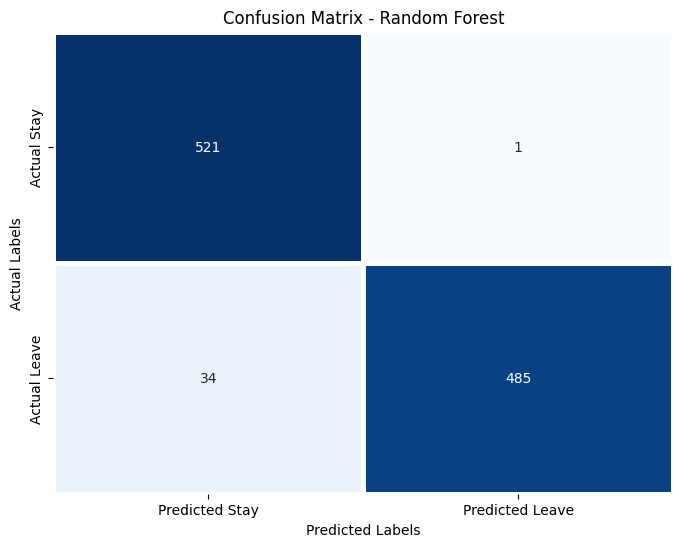

In [ ]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap='Blues', linewidths=2.5, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Random Forest')
plt.xticks([0.5, 1.5], ['Predicted Stay', 'Predicted Leave'])
plt.yticks([0.5, 1.5], ['Actual Stay', 'Actual Leave'])

plt.show()


In [ ]:
print(conf_matrix_rf)

[[521   1]
 [ 34 485]]


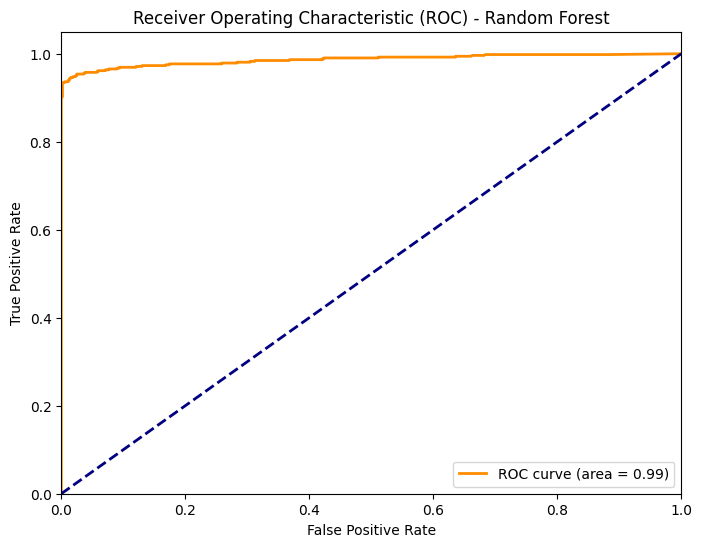

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_rf = roc_auc_score(y_test,rf_model.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc='lower right')
plt.show()


In [ ]:

# Assuming you have already trained these models
# Save the Logistic Regression model
with open('logistic_regression.pkl', 'wb') as file:
    pickle.dump(logistic_regression_model, file)

# Save the Decision Tree model
with open('decision_tree.pkl', 'wb') as file:
    pickle.dump(decision_tree_model, file)

# Save the SVM model
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)


Prediction

In [ ]:
# Create a dictionary with the input fields of unseen data
data = {
    'satisfaction_level': [0.11, 0.99, 0.39, 0.48, 0.93],
    'evaluation_score': [0.91, 0.39, 0.53, 0.89, 0.50],
    'project_count': [7, 6, 2, 5, 5],
    'monthly_hours': [287, 214, 136, 179, 272],
    'tenure': [4, 5, 3, 3, 3],
    'had_accident': [0, 1, 0, 0, 0],
    'had_promotion': [0, 0, 0, 0, 0],
    'salary_level': [1, 1, 1, 2, 1],
    'work_intensity': [2009, 1284, 272, 895, 1360],
    'overtime': [1, 1, 0, 1, 1],
    'work_life_balance': [0.000096, 0.000925, 0.000956, 0.000894, 0.001140]
}
# Convert the dictionary to a pandas DataFrame
input_df = pd.DataFrame.from_dict(data)
input_df.head()

# Ensure all input features are in the correct order
input_df_scaled = scaler.transform(input_df)

# Call the predict method of the loaded model
y_pred = loaded_model.predict(input_df_scaled)
print('Prediction based on final tuned random forest model:', y_pred)

Prediction based on final tuned random forest model: [1 0 1 0 0]
